In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import fetch_california_housing
cal = fetch_california_housing()

In [3]:
print(cal.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
cal_df = pd.DataFrame(cal.data)
cal_df.columns = cal.feature_names

C:\Users\grech\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


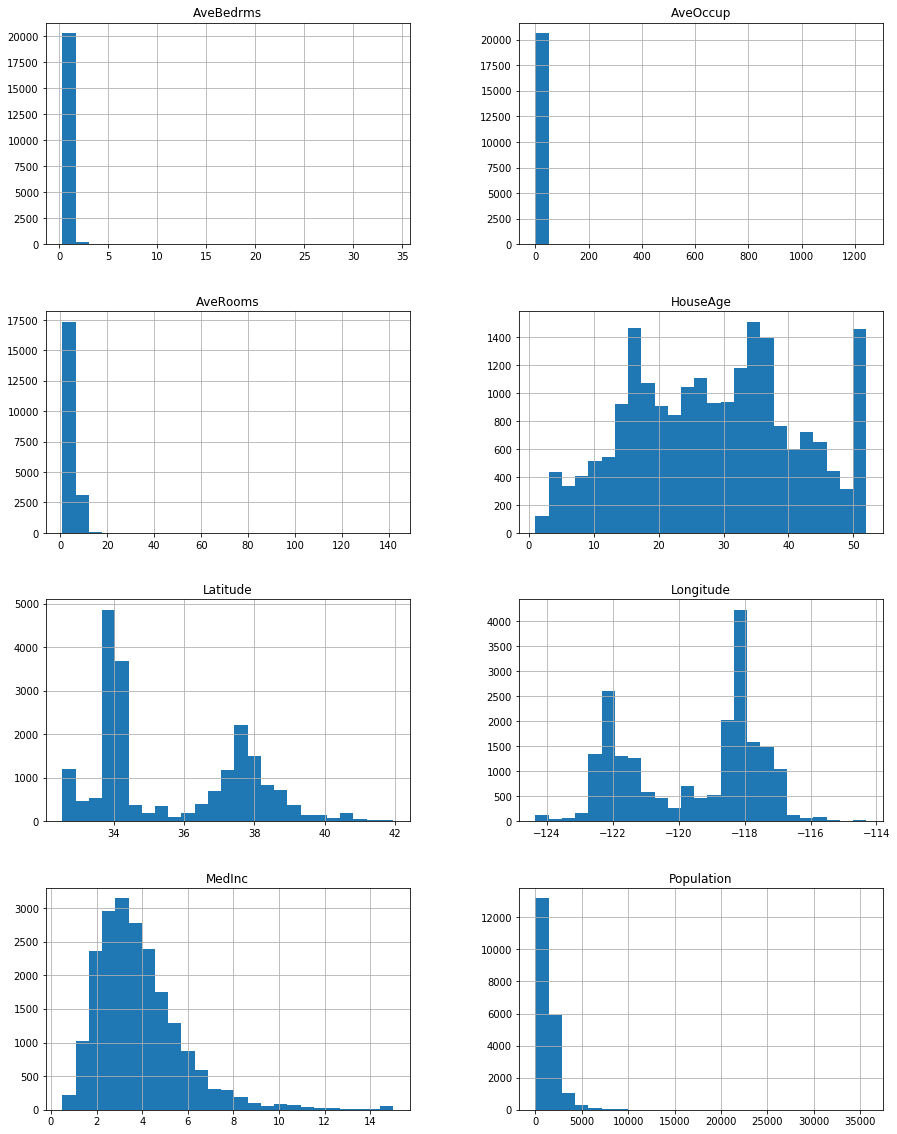

In [5]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
cal_df.hist(ax = ax, bins = 25, layout=(-1, 2))
plt.show()

In [6]:
X = cal_df.values
y = cal.target

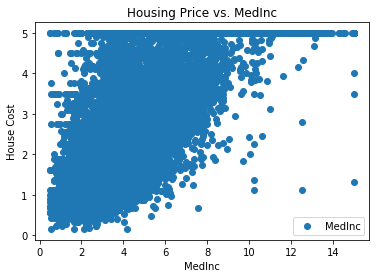

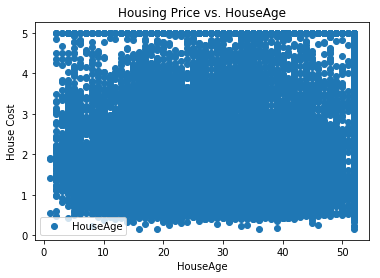

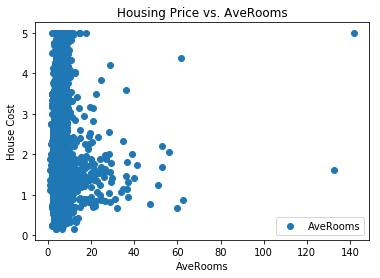

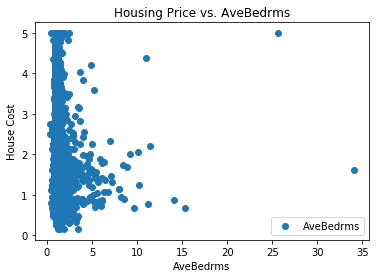

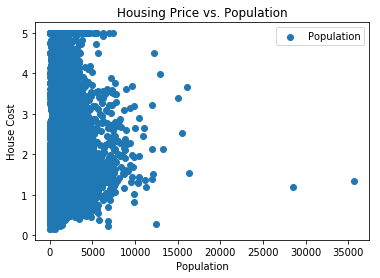

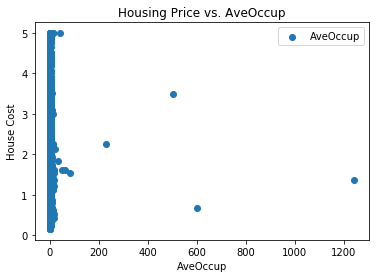

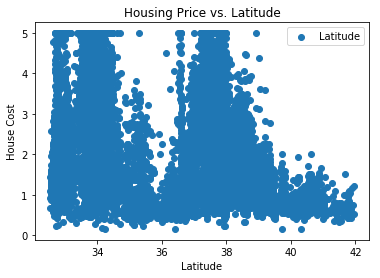

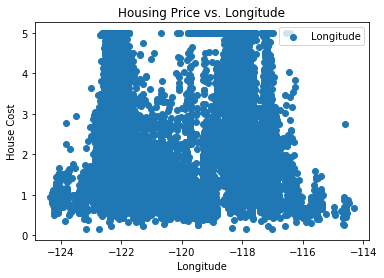

In [7]:
for column in cal_df:
    x = cal_df[column]
    plt.scatter(x, y, label = column)
    plt.ylabel('House Cost')
    plt.xlabel(column)
    plt.title('Housing Price vs. ' + column)
    plt.legend()
    plt.show()

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [60]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet()]
def run_cases(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)
    for model in models:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring= 'neg_mean_absolute_error')
        print(str(model).split('(')[0] + ' R^2', abs(scores).mean())

In [61]:
#Not scaled features
run_cases(X, y)

LinearRegression R^2 0.5279879232838869
Ridge R^2 0.5280051865749653
Lasso R^2 0.7697898067409374
ElasticNet R^2 0.678966818346656


In [62]:
#Scaled features
run_cases(X_scaled, y)

LinearRegression R^2 0.5279879232838481
Ridge R^2 0.5279818561729331
Lasso R^2 0.9024655367185686
ElasticNet R^2 0.80950549909697


### Scaling the data significantly improved the accuracy for the Lasso and the Elastic Net. It did not affect the performance of the linear regression model. The Ridge Regression model stays basically the same.

In [53]:
def run_grid_search(model, params):
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    results = grid.grid_scores_
    
    params = []
    scores = []
    for score in results:
        mean = score[1]
        param = score[0]['alpha']
        scores.append(abs(mean))
        params.append(param)
        
        
    ax = plt.subplot(111)
    ax.scatter(params, scores)
    ax.set_title('Grid Search Results for ' + str(model).split('(')[0])
    ax.set_xlabel('Alpha value')
    ax.set_ylabel('$R^2$')
    plt.show()    
    return params, scores

In [72]:
equal_spacing = np.linspace(1e-8, 1, 50)

In [73]:
from sklearn.model_selection import GridSearchCV
ridge_param = {'alpha':equal_spacing}
lasso_param = {'alpha':equal_spacing}
elstic_param = {'alpha':equal_spacing} #, 'l1_ratio':(0, 0.25, 0.5, 0.75, 1.0)

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


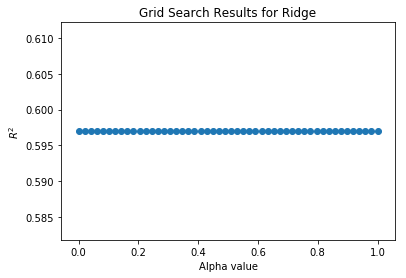

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


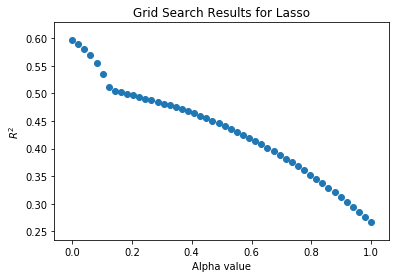

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


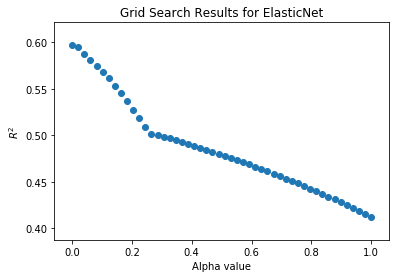

In [74]:
params1, scores1 = run_grid_search(models[1], ridge_param)
params2, scores2 = run_grid_search(models[2], lasso_param)
params3, scores3 = run_grid_search(models[3], elstic_param)

### Intrestingly all of the models perform better with lower reguralization as can be seen by the models having the highest $R^2$ value near the origin. The Ridge Regression model does not change as you change the alpha value.

In [43]:
imps = []
for model in models:
    model.fit(X_train, y_train)
    feature_imp = model.coef_
    imps.append(feature_imp)

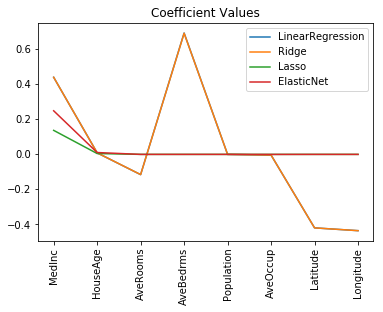

In [45]:
feature_names = list(cal.feature_names)
for i, imp in enumerate(imps):
    plt.plot(imp, label = str(models[i]).split('(')[0])
    plt.legend()
plt.title('Coefficient Values')
locs, labels = plt.xticks()
plt.xticks(np.arange(len(feature_names)), feature_names, rotation = 90)
plt.show()
